# Simple Linear Regression using Sci-kit Library

In [17]:
# ----------------------------------------------------------
# 📘 Simple Linear Regression using scikit-learn
# ----------------------------------------------------------
# We will use scikit-learn's LinearRegression to fit
# the housing dataset: Area (x) vs Price (y).
# ----------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ----------------------------------------------------------
# Step 1: Define the dataset
# ----------------------------------------------------------
data = {
    "Area": [1000, 1500, 2000, 2500, 3000],
    "Price": [250, 400, 450, 500, 550]
}
df = pd.DataFrame(data)

print("Dataset:")
print(df.to_string(index=False))
print()

# ----------------------------------------------------------
# Step 2: Prepare X and y for sklearn
# ----------------------------------------------------------
X = df[["Area"]]   # independent variable (2D)
y = df["Price"]    # dependent variable (1D)

# ----------------------------------------------------------
# Step 3: Fit the Linear Regression model
# ----------------------------------------------------------
model = LinearRegression()
model.fit(X, y)

# Get slope (coef_) and intercept
beta1 = model.coef_[0]
beta0 = model.intercept_

print(f"Regression Equation: ŷ = {beta0:.2f} + {beta1:.2f}x\n")

# ----------------------------------------------------------
# Step 4: Predictions
# ----------------------------------------------------------
df["ŷ (Predicted Price)"] = model.predict(X)
df["Residuals"] = y - df["ŷ (Predicted Price)"]

print("Predictions and Residuals:")
print(df.to_string(index=False))
print()

# ----------------------------------------------------------
# Step 5: Error metrics
# ----------------------------------------------------------
RSS = np.sum(df["Residuals"]**2)             # Residual Sum of Squares
MSE = mean_squared_error(y, df["ŷ (Predicted Price)"])
RMSE = np.sqrt(MSE)
R2 = r2_score(y, df["ŷ (Predicted Price)"])

print("Model Performance Metrics:")
print(f" RSS  (Residual Sum of Squares):      {RSS:.2f}")
print(f" MSE  (Mean Squared Error):           {MSE:.2f}")
print(f" RMSE (Root Mean Squared Error):      {RMSE:.2f}")
print(f" R²   (Coefficient of Determination): {R2:.4f}\n")

Dataset:
 Area  Price
 1000    250
 1500    400
 2000    450
 2500    500
 3000    550

Regression Equation: ŷ = 150.00 + 0.14x

Predictions and Residuals:
 Area  Price  ŷ (Predicted Price)     Residuals
 1000    250                290.0 -4.000000e+01
 1500    400                360.0  4.000000e+01
 2000    450                430.0  2.000000e+01
 2500    500                500.0 -5.684342e-14
 3000    550                570.0 -2.000000e+01

Model Performance Metrics:
 RSS  (Residual Sum of Squares):      4000.00
 MSE  (Mean Squared Error):           800.00
 RMSE (Root Mean Squared Error):      28.28
 R²   (Coefficient of Determination): 0.9245



# Simple Linear Regression from Scratch

We will build a simple linear regression model step by step using **only Python (NumPy & Pandas)**, not sklearn/statsmodels.

Dataset: **House Area (x)** vs **House Price (y)**

### Steps:
1. Dataset setup  
2. Mean calculations  
3. Deviation table  
4. Slope & Intercept derivation  
5. Regression equation  
6. Predictions & Residuals  
7. Error metrics (RSS, MSE, RMSE, R²)  
8. Visualization  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Define the dataset

We are given the following dataset:

| Area (sq ft) | Price ($1000s) |
|--------------|----------------|
| 1000         | 250            |
| 1500         | 400            |
| 2000         | 450            |
| 2500         | 500            |
| 3000         | 550            |

In [5]:
data = {
    "Area": [1000, 1500, 2000, 2500, 3000],
    "Price": [250, 400, 450, 500, 550]
}
df = pd.DataFrame(data)
print("📊 Dataset:")
print(df.to_string(index=False))

📊 Dataset:
 Area  Price
 1000    250
 1500    400
 2000    450
 2500    500
 3000    550


## Step 2: Compute the means of x and y

The formulas are:  

$$
\bar{x} = \frac{\sum x}{n}, \quad \bar{y} = \frac{\sum y}{n}
$$

In [7]:
x = df["Area"].values
y = df["Price"].values

x_mean = np.mean(x)
y_mean = np.mean(y)

print(f"Mean of Area (x̄): {x_mean:.2f}")
print(f"Mean of Price (ȳ): {y_mean:.2f}")

Mean of Area (x̄): 2000.00
Mean of Price (ȳ): 430.00


## Step 3: Build the deviation table

For each point, compute:

$$ (x - \bar{x}) $$
$$ (y - \bar{y}) $$
$$ ((x - \bar{x})(y - \bar{y})) $$
$$ ((x - \bar{x})^2) $$

In [9]:
df["x - x̄"] = x - x_mean
df["y - ȳ"] = y - y_mean
df["(x - x̄)(y - ȳ)"] = df["x - x̄"] * df["y - ȳ"]
df["(x - x̄)^2"] = df["x - x̄"] ** 2

print("📝 Deviation Table:")
print(df.to_string(index=False))

📝 Deviation Table:
 Area  Price  x - x̄  y - ȳ  (x - x̄)(y - ȳ)  (x - x̄)^2
 1000    250 -1000.0 -180.0         180000.0   1000000.0
 1500    400  -500.0  -30.0          15000.0    250000.0
 2000    450     0.0   20.0              0.0         0.0
 2500    500   500.0   70.0          35000.0    250000.0
 3000    550  1000.0  120.0         120000.0   1000000.0


## Step 4: Calculate slope (β₁) and intercept (β₀)

Formulas:  

$$
\hat{\beta}_1 = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}
$$  

$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$  

In [11]:
num = df["(x - x̄)(y - ȳ)"].sum()
den = df["(x - x̄)^2"].sum()

beta1 = num / den
beta0 = y_mean - beta1 * x_mean

print(f"Slope (β₁): {beta1:.4f}")
print(f"Intercept (β₀): {beta0:.4f}")

Slope (β₁): 0.1400
Intercept (β₀): 150.0000


## Step 5: Regression equation

The regression line is:

$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x
$$

In [13]:
print(f" Regression Equation: ŷ = {beta0:.2f} + {beta1:.2f}x")

 Regression Equation: ŷ = 150.00 + 0.14x


## Step 6: Predictions and Residuals

We calculate:  

- Predicted values:  
$$
\hat{y} = \beta_0 + \beta_1 x
$$  

- Residuals:  
$$
e = y - \hat{y}
$$  

In [15]:
df["ŷ (Predicted Price)"] = beta0 + beta1 * df["Area"]
df["Residuals"] = df["Price"] - df["ŷ (Predicted Price)"]

print("🔮 Predictions and Residuals:")
print(df[["Area","Price","ŷ (Predicted Price)","Residuals"]].to_string(index=False))

🔮 Predictions and Residuals:
 Area  Price  ŷ (Predicted Price)     Residuals
 1000    250                290.0 -4.000000e+01
 1500    400                360.0  4.000000e+01
 2000    450                430.0  2.000000e+01
 2500    500                500.0 -5.684342e-14
 3000    550                570.0 -2.000000e+01


## Step 7: Error metrics

- Residual Sum of Squares (RSS):  
$$
RSS = \sum (y - \hat{y})^2
$$  

- Mean Squared Error (MSE):  
$$
MSE = \frac{RSS}{n}
$$  

- Root Mean Squared Error (RMSE):  
$$
RMSE = \sqrt{MSE}
$$  

- Coefficient of Determination (R²):  
$$
R^2 = 1 - \frac{RSS}{TSS}, \quad TSS = \sum (y - \bar{y})^2
$$  

In [17]:
RSS = (df["Residuals"] ** 2).sum()
TSS = ((y - y_mean) ** 2).sum()
MSE = RSS / len(df)
RMSE = np.sqrt(MSE)
R2 = 1 - (RSS / TSS)

print(f"RSS  (Residual Sum of Squares): {RSS:.2f}")
print(f"MSE  (Mean Squared Error):      {MSE:.2f}")
print(f"RMSE (Root Mean Squared Error): {RMSE:.2f}")
print(f"R²   (Coefficient of Determination): {R2:.4f}")

RSS  (Residual Sum of Squares): 4000.00
MSE  (Mean Squared Error):      800.00
RMSE (Root Mean Squared Error): 28.28
R²   (Coefficient of Determination): 0.9245


## Step 8: Plot regression line

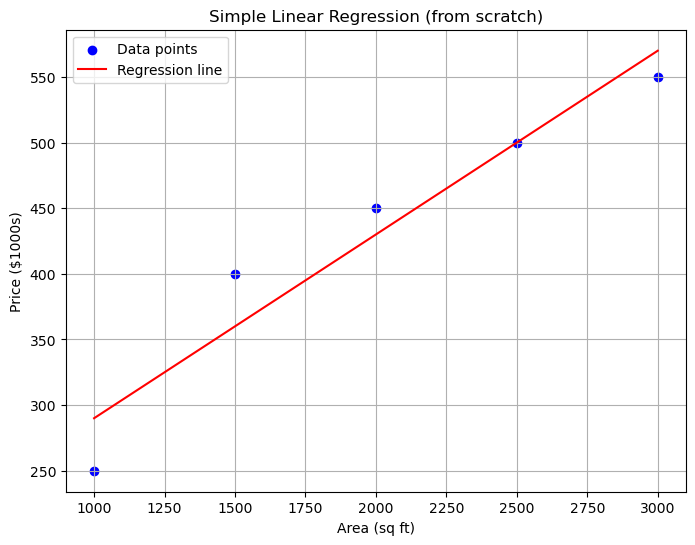

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, beta0 + beta1*x, color="red", label="Regression line")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Simple Linear Regression (from scratch)")
plt.legend()
plt.grid(True)
plt.show()

## Step 9: Residual plot
Residuals should be scattered randomly around zero.

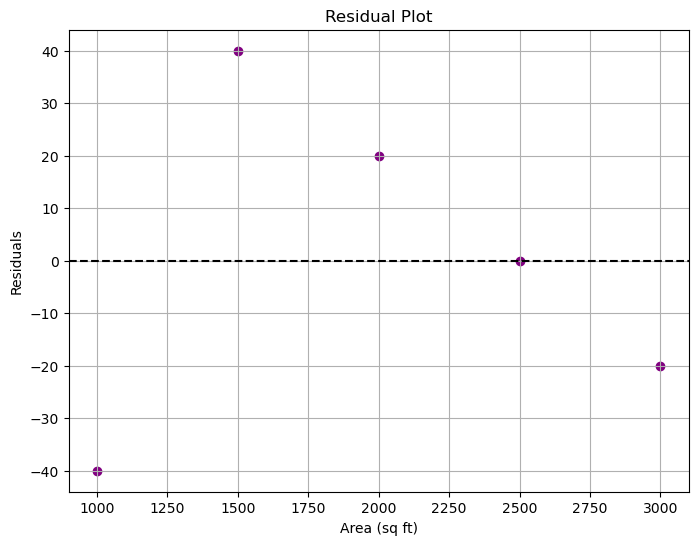

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x, df["Residuals"], color="purple")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Area (sq ft)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()